In [94]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

def f_true(x):
    y = 6.0 * (np.sin(x + 2) + np.sin(2*x + 4))
    return y

def polynomial_transform(X,d):
    yes = np.vander(X,d,increasing=True)
    return yes

def train_model(Phi,y):
    trans = Phi.T
    multiply = Phi @ trans 
    inverse = np.linalg.inv(multiply)
    multiply2 = trans @ inverse 
    w_final = multiply2 @ y 
    return w_final
    
def evaluate_model(phi,y,w):
    print(phi.shape, y.shape, w.shape)
    summation = 0
    n = len(y)
    for i in range (0,n):
        w_transpose = w.T 
        multiply = np.dot(w_transpose, phi[i])
        difference = y[i] - multiply
        squared_difference = difference**2 
        summation = summation + squared_difference
    MSE = summation/n
    return MSE  
    


(53, 3) (53,) (3,)
(225, 3) (225,) (3,)
(53, 6) (53,) (6,)
(225, 6) (225,) (6,)
(53, 9) (53,) (9,)
(225, 9) (225,) (9,)
(53, 12) (53,) (12,)
(225, 12) (225,) (12,)
(53, 15) (53,) (15,)
(225, 15) (225,) (15,)
(53, 18) (53,) (18,)
(225, 18) (225,) (18,)
(53, 21) (53,) (21,)
(225, 21) (225,) (21,)
(53, 24) (53,) (24,)
(225, 24) (225,) (24,)


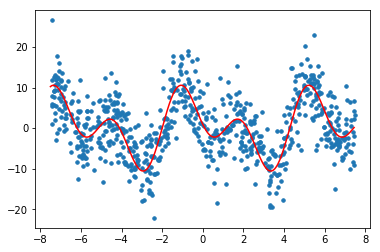

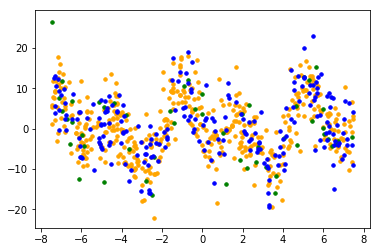

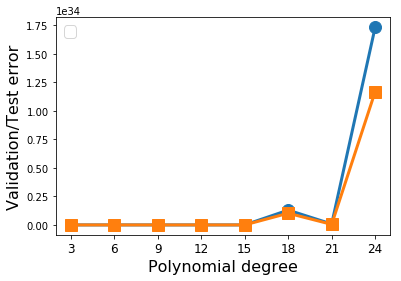

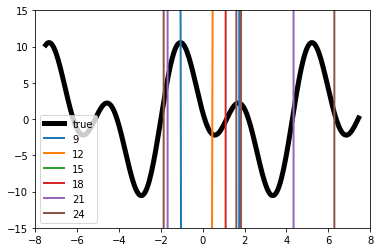

In [95]:
n = 750  #Number of data points
X = np.random.uniform(-7.5, 7.5, n) #Training examples, in one dimension
e = np.random.normal(0.0, 5.0, n) #Random Gaussian noise
y = f_true(X) + e #True labels with noise
    
plt.figure()
# Plot the data
plt.scatter(X, y, 12, marker='o') # Plot the true function, which is really "unknown"
x_true = np.arange(-7.5, 7.5, 0.05)
y_true = f_true(x_true)
plt.plot(x_true, y_true, marker='None', color='r')    
# plt.show()

tst_frac = 0.3 # Fraction of examples to sample for the test set
val_frac = 0.1 # Fraction of examples to sample for the validation set
# First, we use train_test_split to partition (X, y) into training and test sets
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, random_state=42)
# Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, random_state=42)
# Plot the three subsets
plt.figure()
plt.scatter(X_trn, y_trn, 12, marker='o', color='orange')
plt.scatter(X_val, y_val, 12, marker='o', color='green')
plt.scatter(X_tst, y_tst, 12, marker='o', color='blue')
# plt.show()
    
w = {}
validationErr = {}
testErr = {}

for d in range(3, 25, 3):
    Phi_trn = polynomial_transform(X_trn, d) # Transform training data into d dimensions
    w[d] = train_model(Phi_trn, y_trn) # Learn model on training data
    Phi_val = polynomial_transform(X_val, d) # Transform validation data into d dimensions
    validationErr[d] = evaluate_model(Phi_val, y_val, w[d]) # Evaluate model on validation data
    Phi_tst = polynomial_transform(X_tst, d) # Transform test data into d dimensions
    testErr[d] = evaluate_model(Phi_tst, y_tst, w[d]) # Evaluate model on test data
    
# Plot all the models
plt.figure()
plt.xlabel('Polynomial degree', fontsize=16)
plt.ylabel('Validation/Test error', fontsize=16)
plt.xticks(list(validationErr.keys()), fontsize=12)
plt.legend(['Validation Error', 'Test Error'], fontsize=16)
# plt.axis([2, 25, 15, 60])
plt.plot(list(validationErr.keys()), list(validationErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(testErr.keys()), list(testErr.values()), marker='s', linewidth=3, markersize=12)
# plt.plot(validationErr.keys(), validationErr.values(), marker='o', linewidth=3, markersize=12)
# plt.plot(testErr.keys(), testErr.values(), marker='s', linewidth=3, markersize=12)
# plt.show()




plt.figure()
plt.plot(x_true, y_true, marker='None', linewidth=5, color='k')
for d in range(9, 25, 3):
    X_d = polynomial_transform(x_true, d)
    y_d = X_d @ w[d]
    plt.plot(x_true, y_d, marker='None', linewidth=2)
    
plt.legend(['true'] + list(range(9, 25, 3)))
plt.axis([-8, 8, -15, 15])
plt.show()

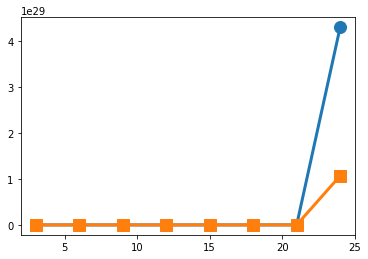

In [87]:
plt.plot(list(validationErr.keys()), list(validationErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(testErr.keys()), list(testErr.values()), marker='s', linewidth=3, markersize=12)
plt.show()

In [91]:
list(validationErr.keys()), list(validationErr.values()), list(testErr.keys()), list(testErr.values())

([3, 6, 9, 12, 15, 18, 21, 24],
 [8454456436.9411583,
  4630071316971.752,
  9983988664497738.0,
  7.01546635584628e+19,
  3.4725552897479677e+21,
  1.8584246619967585e+23,
  5.7062011213846993e+25,
  4.2989695671124277e+29],
 [3, 6, 9, 12, 15, 18, 21, 24],
 [4365398847.7646618,
  1697033638559.3601,
  3139313145171374.0,
  2.0324114667583787e+19,
  9.4856434717337256e+20,
  4.7169883173826469e+22,
  1.473229389951493e+25,
  1.0686443251194766e+29])

In [73]:
list(validationErr.keys()), list(validationErr.values()),list(testErr.keys()), list(testErr.values())
# ,testErr

([3, 6, 9, 12, 15, 18, 21, 24],
 [7865075.3946628151,
  120439182214.50211,
  10697869368135700.0,
  8.3021262443187234e+20,
  2.2009597650907662e+26,
  1.0171122800085248e+31,
  3.7810431722359965e+32,
  2.2306859653234505e+33],
 [3, 6, 9, 12, 15, 18, 21, 24],
 [7759319.7002046462,
  134751880075.27614,
  11095889365218838.0,
  6.8023253880713419e+20,
  2.1999821110012796e+26,
  9.9588628576503612e+30,
  3.3586251133657678e+32,
  2.1135920819525903e+33])

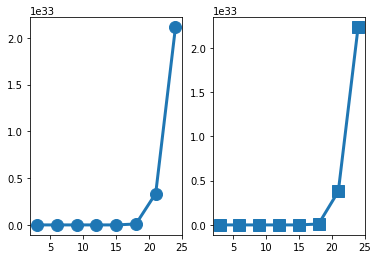

In [70]:
plt.subplot(1,2,1)
plt.plot(list(testErr.keys()), list(testErr.values()), marker='o', linewidth=3, markersize=12)
plt.subplot(1,2,2)
plt.plot(list(validationErr.keys()), list(validationErr.values()), marker='s', linewidth=3, markersize=12)
plt.show()

In [29]:
Phi=polynomial_transform(X, d)
trans_1 = Phi.T
multiply_1 = Phi @ trans_1 
inverse_1 = np.linalg.inv(multiply_1)
multiply2_1 = trans_1 @ inverse_1 
w_final = multiply2_1 * y 
# return w_final

In [42]:
Phi.shape,trans_1.shape, multiply_1.shape, inverse_1.shape, multiply2_1.shape, w_final.shape, 

((750, 24), (24, 750), (750, 750), (750, 750), (24, 750), (24, 750))

In [93]:
import numpy as np
import math

def radial_basis_transform(X,B,gamma = 0.1):
    rbk = math.exp((-1 * gamma)*(X-B)**2) 
    return rbk 

def train_ridge_model(Phi,y,lam):
    Phi_transpose = Phi.transpose()
    t2 = np.identity(n).dot(lam)
    t_inv = ((Phi_transpose.dot(Phi)) + t2 )
    trm = np.linalg.inv(t_inv).dot(Phi_transpose) 
    final_trm = trm.dot(y)
    return final_trm 



0.6703200460356393